# Techical Note

## PN-LW results for Cu K$\alpha$ (8.04 keV) line: FWHM analysis as a function of pattern and time

According to the EPIC-pn instrument and calibration scientists (at MPE), the implementation of the pattern offsets for the energy scale in EPIC-pn Large Window Mode (see [XMM-CCF-REL-367](http://xmm2.esac.esa.int/docs/documents/CAL-SRN-0367-1-0.pdf)), would lead to improved spectral resolution at 8 keV.

My idea of testing this possible beneficial effect is to check how the best-fit FWHM of the Cu-K$\alpha$ line changes in comparison with the previous calibration, for both single and double events. In addition, we can also perform trend analysis of the FWHM evolution with time.

**Author:** Ivan Valtchanov, XMM-SOC, June 2019

In [29]:
import os
import numpy as np
import altair as alt
import pandas as pd

from astropy.table import Table, Column
from astropy.io import fits
home = os.path.expanduser('~')

%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style="white")

plt.rc('text', usetex=False)
plt.rc('font', family='serif')

## Read the Cu K$\alpha$ fit results 

Using the latest implemented CTI CCF, EPN_CTI_0050.CCF, the fit results are in two CSV files, one for single events and another for double events.

In [30]:
wdir = f"{home}/IVAN/Cu-line"
# CTI49/50
wdir = f"{home}/IVAN/Cu-line"
# pattern zero (single events)
t1 = Table.read(f'{wdir}/fit_results_cuka_cti50.csv')
# pattern 1 to 4 (double events)
t2 = Table.read(f'{wdir}/fit_results_cuka_doubles_cti50.csv')

We shall compare the results with the previous CCF, EPN_CTI_0048.CCF. These results are also in two CSV files, one for single events and another for double events..

In [31]:
#
# OLD CTI, v48
xt1 = Table.read(f'{wdir}/fit_results_cuka_cti48.csv')
xt2 = Table.read(f'{wdir}/fit_results_cuka_doubles_cti48.csv')

## Grouping by CCD number

As we are going to present the results per CCD, we group the tables by CCD.

In [32]:
t1ccd = t1.group_by('ccd')
t2ccd = t2.group_by('ccd')
#
xt1ccd = xt1.group_by('ccd')
xt2ccd = xt2.group_by('ccd')


## Plot the fit results for the FWHM per CCD and PATTERN

Note the CCD plots are organised in a way that represents the CCDs physical location in the focal plane.

The Cu K$\alpha$ line is not prominent in the central 4 CCDs, near the boresight (CCD#4), so the results for CCDs 1, 4, 7 and 10 are noisy. 

CCD 1 singles: slope: -0.63, intercept: 183.03
CCD 2 singles: slope: 2.39, intercept: 162.31
CCD 3 singles: slope: 2.04, intercept: 174.04
CCD 4 singles: slope: -17.91, intercept: 466.69
CCD 5 singles: slope: 2.10, intercept: 170.80
CCD 6 singles: slope: 2.00, intercept: 169.03
CCD 7 singles: slope: -0.70, intercept: 176.35
CCD 8 singles: slope: 2.41, intercept: 161.36
CCD 9 singles: slope: 2.83, intercept: 163.00
CCD 10 singles: slope: 0.15, intercept: 178.51
CCD 11 singles: slope: 3.06, intercept: 157.19
CCD 12 singles: slope: 1.94, intercept: 169.00


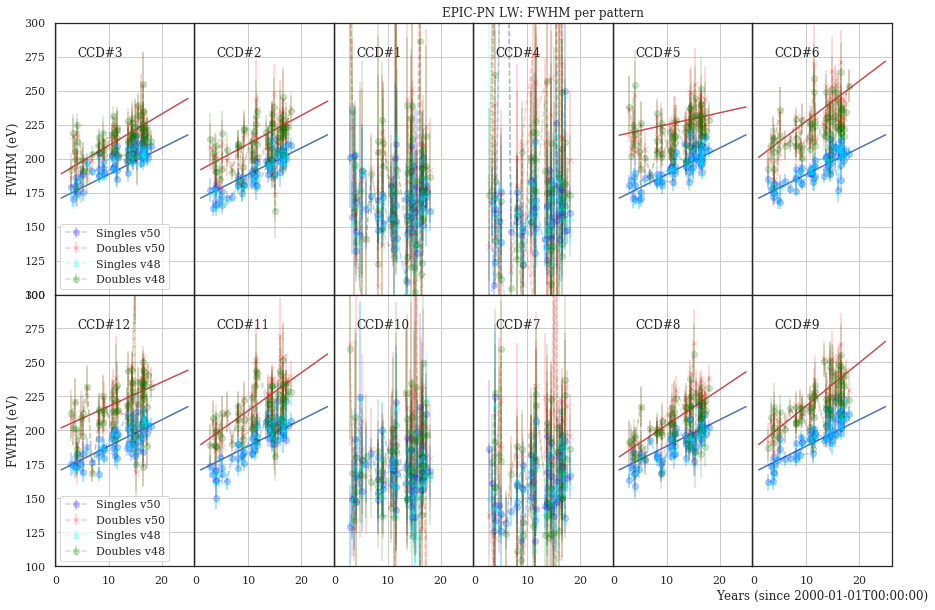

In [41]:
#
fig, axs = plt.subplots(2,6,sharex=True,sharey=True,figsize=(15,10))
#
central = [1,4,7,10]
#
# CCD position in plot
#
mapping = {1: [0,2], 2: [0,1], 3: [0,0], 4: [0,3], 5: [0,4], 6: [0,5],
          7: [1,3], 8: [1,4], 9: [1,5], 10: [1,2], 11: [1,1], 12: [1,0]}
#
runtime = np.linspace(1,25)
for j in range(12):
    ccd = j+1
    q1 = (t1ccd.groups.keys['ccd'] == ccd)
    q2 = (t2ccd.groups.keys['ccd'] == ccd)
    t1q = t1ccd.groups[q1]
    t2q = t2ccd.groups[q2]    
    #
    xq1 = (xt1ccd.groups.keys['ccd'] == ccd)
    xq2 = (xt2ccd.groups.keys['ccd'] == ccd)
    xt1q = xt1ccd.groups[xq1]
    xt2q = xt2ccd.groups[xq2]
    #
    # linear fit for the trend
    #
    z1 = np.polyfit(t1q['delta_time'],1000*t1q['fwhm'],1,w=1.0/1000*t1q['fwhm_err'])
    p1 = np.poly1d(z1)
    fitted1 = p1(runtime)
    #
    z2 = np.polyfit(t2q['delta_time'],1000*t2q['fwhm'],1,w=1.0/1000*t2q['fwhm_err'])
    p2 = np.poly1d(z2)
    fitted2 = p2(runtime)
    #
    print (f"CCD {ccd} singles: slope: {z1[0]:.2f}, intercept: {z1[1]:.2f}")
    #
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(t1q['delta_time'],1000*t1q['fwhm'],yerr=1000*t1q['fwhm_err'],
                       color='blue',fmt='o',alpha=0.2,linestyle='dashed',label="Singles v50")
    if (ccd not in central):
        axs[mapping[ccd][0],mapping[ccd][1]].plot(runtime,fitted,'b-',label="")
        axs[mapping[ccd][0],mapping[ccd][1]].plot(runtime,fitted2,'r-',label="")
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(t2q['delta_time'],1000*t2q['fwhm'],yerr=1000*t2q['fwhm_err'],
                       color='red',fmt='x',alpha=0.2,linestyle='dashed',label="Doubles v50")
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(xt1q['delta_time'],1000*xt1q['fwhm'],yerr=1000*xt1q['fwhm_err'],
                       color='cyan',fmt='^',alpha=0.2,linestyle='dashed',label="Singles v48")
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(xt2q['delta_time'],1000*xt2q['fwhm'],yerr=1000*xt2q['fwhm_err'],
                       color='green',fmt='o',alpha=0.2,linestyle='dashed',label="Doubles v48")
    #
    axs[mapping[ccd][0],mapping[ccd][1]].text(4.0,275.0,f'CCD#{ccd}')
    axs[mapping[ccd][0],mapping[ccd][1]].grid()
    if (ccd == 4):
        axs[mapping[ccd][0],mapping[ccd][1]].set_title(f"EPIC-PN LW: FWHM per pattern")
    if (ccd == 3 or ccd == 12):
        axs[mapping[ccd][0],mapping[ccd][1]].set_ylabel(r"FWHM (eV)")
        axs[mapping[ccd][0],mapping[ccd][1]].legend(loc=3)
    if (ccd == 9):
        axs[mapping[ccd][0],mapping[ccd][1]].set_xlabel("Years (since 2000-01-01T00:00:00)")
    axs[mapping[ccd][0],mapping[ccd][1]].set_ylim((100,300))
#
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig(f"{wdir}/offsets_patterns_{vtest}.png",dpi=100)
plt.show();
#plt.close();

## Plot the fit results for the FWHM differnece per CCD and PATTERN

The difference is the best fit FWHM in v50 - v48.


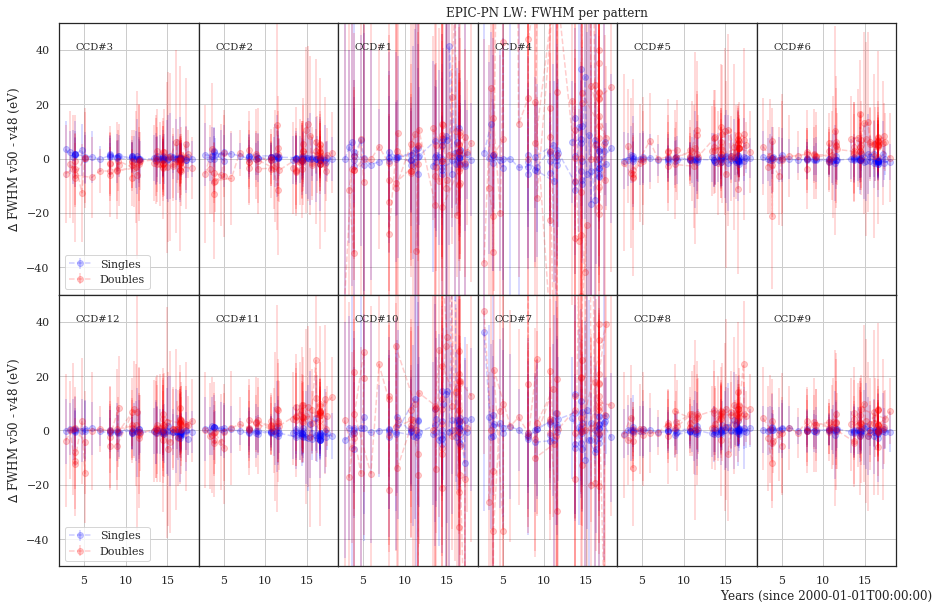

In [28]:
#
# Differences in FWHM
#
fig, axs = plt.subplots(2,6,sharex=True,sharey=True,figsize=(15,10))
#
# CCD position in plot
#
mapping = {1: [0,2], 2: [0,1], 3: [0,0], 4: [0,3], 5: [0,4], 6: [0,5],
          7: [1,3], 8: [1,4], 9: [1,5], 10: [1,2], 11: [1,1], 12: [1,0]}
#
colx = {1:'blue',2:'orange', 3:'green',4:'red'}
#
for j in range(12):
    ccd = j+1
    q1 = (t1ccd.groups.keys['ccd'] == ccd)
    q2 = (t2ccd.groups.keys['ccd'] == ccd)
    t1q = t1ccd.groups[q1]
    t2q = t2ccd.groups[q2]    
    #
    xq1 = (xt1ccd.groups.keys['ccd'] == ccd)
    xq2 = (xt2ccd.groups.keys['ccd'] == ccd)
    xt1q = xt1ccd.groups[xq1]
    xt2q = xt2ccd.groups[xq2]
    #
    k = j
    kj = 0
    if (j >= 6):
        k = j - 6
        kj = 1
    # singles difference
    df1 = 1000*(t1q['fwhm'] - xt1q['fwhm'])
    df1err = 1000*np.sqrt(t1q['fwhm_err']*t1q['fwhm_err'] + xt1q['fwhm_err']*xt1q['fwhm_err'])
    # doubles difference
    df2 = 1000*(t2q['fwhm'] - xt2q['fwhm'])
    df2err = 1000*np.sqrt(t2q['fwhm_err']*t2q['fwhm_err'] + xt2q['fwhm_err']*xt2q['fwhm_err'])
    #
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(t1q['delta_time'],df1,yerr=df1err,
                       color='blue',fmt='o',alpha=0.2,linestyle='dashed',label=f"Singles")
    axs[mapping[ccd][0],mapping[ccd][1]].errorbar(t2q['delta_time'],df2,yerr=df2err,
                       color='red',fmt='o',alpha=0.2,linestyle='dashed',label=f"Doubles")
    axs[mapping[ccd][0],mapping[ccd][1]].text(4.0,40.0,f'CCD#{ccd}')
    #axs[kj,k].axhline(0.00,color='black',linestyle='dashed')
    axs[kj,k].grid()
    if (ccd == 4):
        axs[mapping[ccd][0],mapping[ccd][1]].set_title(f"EPIC-PN LW: FWHM per pattern")
    if (ccd == 12 or ccd == 3):
        axs[mapping[ccd][0],mapping[ccd][1]].set_ylabel(r"$\Delta$ FWHM v50 - v48 (eV)")
        axs[mapping[ccd][0],mapping[ccd][1]].legend(loc=3)
    if (ccd == 9):
        axs[mapping[ccd][0],mapping[ccd][1]].set_xlabel("Years (since 2000-01-01T00:00:00)")
    axs[mapping[ccd][0],mapping[ccd][1]].set_ylim((-50,50))
#
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig(f"{wdir}/cuka_fwhm_patterns_diff.png",dpi=100)
plt.show();
#plt.close();

## Conclusions

* As expected, the FWHM of the single events does not change with the new CCF.
* The differnece of the FWHM of the double events is not significant and with the large uncertainties we cannot conclude whether the offsets for the EPIC-pn Large Window Mode, introduced with `EPN_CTI_0049.CCF` and  `EPN_CTI_0050.CCF`, lead to better spectral resolution at 8 keV.
* Trend analysis: there is a clear trend of FWHM increasing with time. For the CCDs with good signal, e.g. CCD#6, the slope is 2 and the intercept is at 170 eV, whichi means that in 20 years the FWHM increased from 170 to 210 eV, i.e. 2 eV increase per year.
